# What is the AUC-ROC curve?

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

## How Does the AUC-ROC Curve Work?
In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.

Let’s dig a bit deeper and understand how our ROC curve would look like for different threshold values and how the specificity and sensitivity would vary.

Let’s create our arbitrary data using the sklearn make_classification method:



In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [2]:
X

array([[-0.25820289,  1.0198078 ,  1.52456317, ...,  0.33272104,
        -0.17540696,  1.50112422],
       [-0.45816647,  0.82872793, -0.65696499, ...,  1.2019375 ,
        -0.25583476, -0.19931278],
       [-0.3873777 ,  0.76181785, -1.31035138, ..., -1.0332091 ,
        -1.68667137, -0.76683607],
       ...,
       [-0.54779315, -0.67453913, -0.83464431, ...,  0.57821623,
        -1.17254773,  1.08301901],
       [ 0.5596188 , -0.62502523,  1.40453753, ..., -1.66951495,
        -0.29276041,  0.48456871],
       [-1.42487559,  0.52714552,  0.15786417, ...,  3.25163637,
        -0.54779104, -1.51033252]])

In [3]:
y

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,

Lets use two classifiers to test performance:

In [5]:
# train models
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = XGBClassifier()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values:

In [7]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

Lets take a look at the accuracy scores of these two models: 

In [17]:
from sklearn.metrics import accuracy_score

y_pred1 = model1.predict(X_test)
predictions1 = [round(value) for value in y_pred1]

# evaluate predictions
accuracy1 = accuracy_score(y_test, predictions1)
print("Model #1 Accuracy: %.2f%%" % (accuracy1 * 100.0))

y_pred2 = model2.predict(X_test)
predictions2 = [round(value) for value in y_pred2]

# evaluate predictions
accuracy2 = accuracy_score(y_test, predictions2)
print("Model #2 Accuracy: %.2f%%" % (accuracy2 * 100.0))

Model #1 Accuracy: 97.00%
Model #2 Accuracy: 87.00%


The AUC score can be computed using the roc_auc_score() method of sklearn:



In [8]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9826936872309899 0.9233769727403157


We can also plot the ROC curves for the two algorithms using matplotlib:

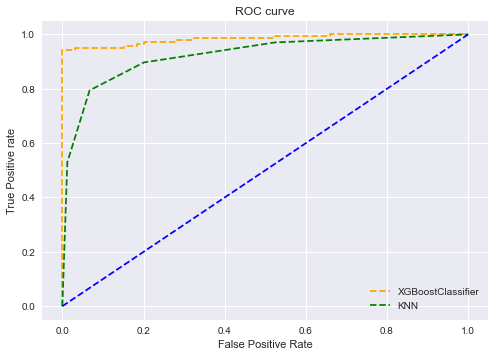

In [10]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBoostClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();